# 2021 My Family PayPal Transactions Data Analysis: Categorizing and Analyzing Spending Patterns

## Data Source : My family Paypal transaction data for the year 2021 

In [66]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For creating static plots
import plotly.express as px  # For creating interactive plots
from datetime import datetime, timedelta, date  # For working with dates and times


In [67]:
# Reading the CSV file containing PayPal transaction data for the year 2021 into a DataFrame and creating a backup
df_backup = pd.read_csv("2021_PAYPAL.CSV")


In [68]:
# Creating a copy of the original DataFrame to work with, preserving the original dataset
df = df_backup.copy()


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        84 non-null     object 
 1   Time        84 non-null     object 
 2   TimeZone    84 non-null     object 
 3   Name        56 non-null     object 
 4   Type        84 non-null     object 
 5   Status      84 non-null     object 
 6   Currency    84 non-null     object 
 7   Amount      84 non-null     object 
 8   Receipt ID  0 non-null      float64
 9   Balance     84 non-null     object 
dtypes: float64(1), object(9)
memory usage: 6.7+ KB


In [70]:
df.head()


,Date,Time,TimeZone,Name,Type,Status,Currency,Amount,Receipt ID,Balance
0,01/10/2021,21:55:06,EST,Chess For All,Express Checkout Payment,Completed,USD,-20.00,NaN,221.68
1,02/15/2021,09:31:04,EST,NaN,General Card Deposit,Completed,USD,21.18,NaN,242.86
2,02/15/2021,09:31:04,EST,The Home Depot,Express Checkout Payment,Completed,USD,-21.18,NaN,221.68
3,02/18/2021,10:41:49,EST,NaN,General Card Deposit,Completed,USD,18.65,NaN,240.33
4,02/18/2021,10:41:49,EST,The Home Depot,Express Checkout Payment,Completed,USD,-18.65,NaN,221.68


In [71]:
df.shape

(84, 10)

In [72]:
df.columns

Index(['Date', 'Time', 'TimeZone', 'Name', 'Type', 'Status', 'Currency',
       'Amount', 'Receipt ID', 'Balance'],
      dtype='object')

In [73]:
# Dropping the 'Receipt ID' column from the DataFrame as it's not needed for analysis
df.drop("Receipt ID", axis=1, inplace=True)


In [74]:
# Dropping all rows containing NaN values (mostly rows for deposits) from the DataFrame
df.dropna(axis=0, inplace=True, ignore_index=True)


In [75]:
df.shape # dropped 84 - 56 = 28 rows

(56, 9)

In [76]:
# Generating descriptive statistics for the DataFrame and transposing the result for better readability
df.describe().T


,count,unique,top,freq
Date,56,32,09/01/2021,4
Time,56,36,00:31:40,3
TimeZone,56,2,EDT,37
Name,56,21,The Home Depot,8
Type,56,8,Express Checkout Payment,22
Status,56,2,Completed,53
Currency,56,1,USD,56
Amount,56,34,-10.59,6
Balance,56,17,192.51,17


In [77]:
df.tail()

,Date,Time,TimeZone,Name,Type,Status,Currency,Amount,Balance
51,12/24/2021,09:16:47,EST,CashStar- BrooksBrothers,Express Checkout Payment,Completed,USD,-150.00,197.51
52,12/24/2021,09:16:47,EST,CashStar- BrooksBrothers,General Authorization,Completed,USD,-150.00,197.51
53,12/28/2021,12:13:52,EST,Groupon Inc,PreApproved Payment Bill User Payment,Completed,USD,-55.00,142.51
54,12/28/2021,12:13:52,EST,Groupon Inc,General Authorization,Completed,USD,-55.00,197.51
55,12/30/2021,18:07:33,EST,Spotify USA Inc,PreApproved Payment Bill User Payment,Completed,USD,-10.59,197.51


In [78]:
df = df[df['Type'].str.contains("Payment",case = False)] # filtering only the rows with the word "payment" to avoid the repetition of rows for the same transaction

In [79]:
df=df.reset_index(drop = True)


In [80]:
df.shape # dropped 56 - 32 = 24 rows 

(32, 9)

In [81]:
df['Amount'] = df['Amount'].apply(lambda x: x.replace('"', '')) # replacing the "  from the Amount column

df['Amount'] = df['Amount'].apply(lambda x: x.replace(',', '')) # replacing the  , from the Amount column


In [82]:
df["Amount"] = df["Amount"].astype(float) # Converting Amount to float

In [83]:
df["Balance"] = df["Balance"].astype(float) # Converting Balance to float

In [84]:
df['Amount'] = df['Amount'].abs() # Covert the amount to positive


In [85]:
df['Date'] = pd.to_datetime(df['Date']) # Converting Date to datetime
df['Year'] = df['Date'].dt.year # created a new column YEAR
df['Month'] = df['Date'].dt.month # created a new column MONTH

In [86]:
# Lists of merchants in different categories
services_list = ["Chess For All", "Spotify USA Inc", "Joytunes Ltd", "Groupon Inc", "PayPal"]
healthcare_list = ["Walmart.com", "Vitacost.com"]
travel_list = ["Airbnb Payments Inc.", "Viator (TripAdvisor)"]
lifestyle_list = ["Skechers By Mail, Inc.", "Macy's", "CHICK-FIL-A #01437", "REI", "Papa John's", "CashStar- BrooksBrothers"]
household_list = ["The Home Depot", "K. Van Bourgondien", "Petco Animal Supplies, Inc.", "Bluestone Perennials", "Best Buy Co., Inc."]

# Iterate through each row in the DataFrame
for i in range(len(df['Name'])):
    # Check if the merchant name belongs to the services list
    if df.loc[i]['Name'] in services_list:
        # Assign the "Services" category to the corresponding row
        df.at[i, 'Merchant Category'] = "Services"
    # Check if the merchant name belongs to the healthcare list
    elif df.loc[i]['Name'] in healthcare_list:
        # Assign the "Healthcare" category to the corresponding row
        df.at[i, 'Merchant Category'] = "Healthcare"
    # Check if the merchant name belongs to the travel list
    elif df.loc[i]['Name'] in travel_list:
        # Assign the "Travel" category to the corresponding row
        df.at[i, 'Merchant Category'] = "Travel"
    # Check if the merchant name belongs to the lifestyle list
    elif df.loc[i]['Name'] in lifestyle_list:
        # Assign the "Lifestyle" category to the corresponding row
        df.at[i, 'Merchant Category'] = "Lifestyle"
    # Check if the merchant name belongs to the household list
    elif df.loc[i]['Name'] in household_list:
        # Assign the "Household" category to the corresponding row
        df.at[i, 'Merchant Category'] = "Household"
    # If the merchant name doesn't match any list, continue to the next iteration
    else:
        continue


In [87]:
df.head()

,Date,Time,TimeZone,Name,Type,Status,Currency,Amount,Balance,Year,Month,Merchant Category
0,2021-01-10,21:55:06,EST,Chess For All,Express Checkout Payment,Completed,USD,20.00,221.68,2021,1,Services
1,2021-02-15,09:31:04,EST,The Home Depot,Express Checkout Payment,Completed,USD,21.18,221.68,2021,2,Household
2,2021-02-18,10:41:49,EST,The Home Depot,Express Checkout Payment,Completed,USD,18.65,221.68,2021,2,Household
3,2021-02-19,08:22:28,EST,The Home Depot,Express Checkout Payment,Completed,USD,11.42,221.68,2021,2,Household
4,2021-03-24,11:01:24,EDT,The Home Depot,Express Checkout Payment,Completed,USD,14.33,221.68,2021,3,Household


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               32 non-null     datetime64[ns]
 1   Time               32 non-null     object        
 2   TimeZone           32 non-null     object        
 3   Name               32 non-null     object        
 4   Type               32 non-null     object        
 5   Status             32 non-null     object        
 6   Currency           32 non-null     object        
 7   Amount             32 non-null     float64       
 8   Balance            32 non-null     float64       
 9   Year               32 non-null     int32         
 10  Month              32 non-null     int32         
 11  Merchant Category  32 non-null     object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(7)
memory usage: 2.9+ KB


### Visualize how the number and total amount of transactions vary over different months throughout the year 2021

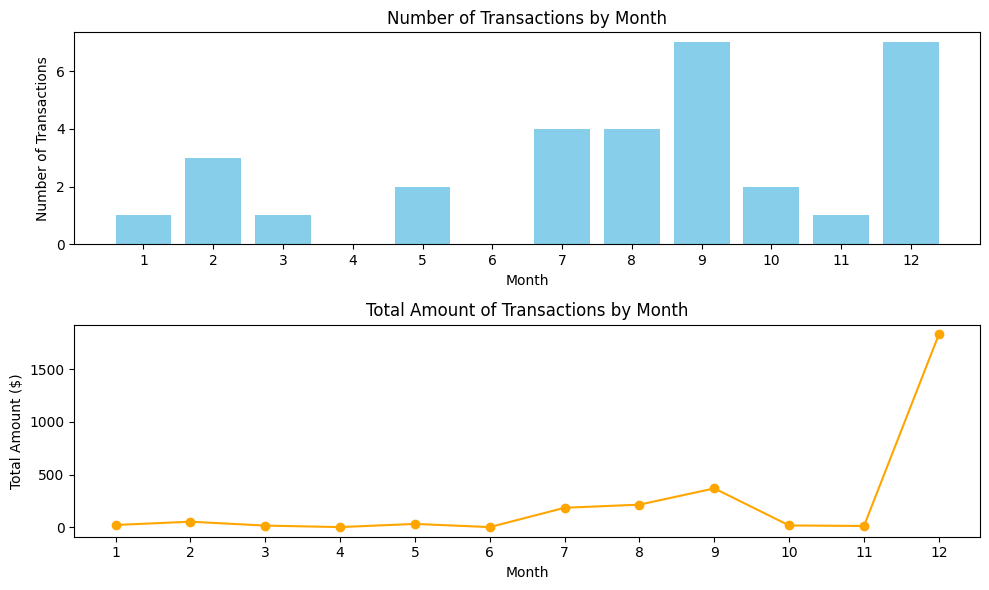

In [89]:
# Define all months
all_months = range(1, 13)

# Group transactions by month and calculate count and sum
monthly_transactions = df.groupby('Month').agg({'Date': 'count', 'Amount': 'sum'}).reindex(all_months, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))

# Number of Transactions
plt.subplot(2, 1, 1)
plt.bar(monthly_transactions.index, monthly_transactions['Date'], color='skyblue')
plt.title('Number of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(all_months)


# Total Amount of Transactions
plt.subplot(2, 1, 2)
plt.plot(monthly_transactions.index, monthly_transactions['Amount'], marker='o', color='orange')
plt.title('Total Amount of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount ($)')
plt.xticks(all_months)


plt.tight_layout()
plt.show()


### Visualize the distribution of transaction counts by merchant names in a pie chart. 

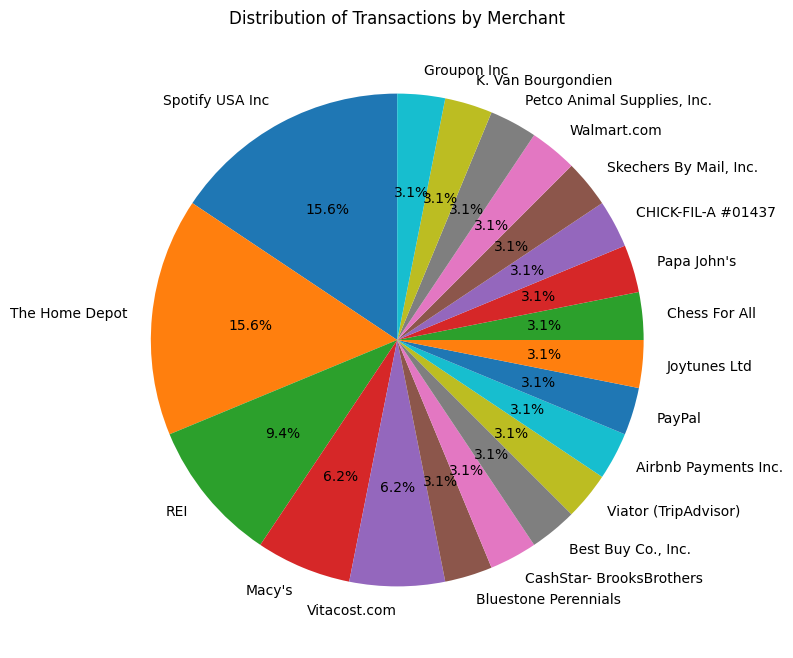

In [90]:
df['Name'].value_counts().plot.pie(figsize=(8, 8), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transactions by Merchant')
plt.ylabel('')
plt.show()

### Visualize how the number and total amount of transactions vary over different quarters throughout the year 2021

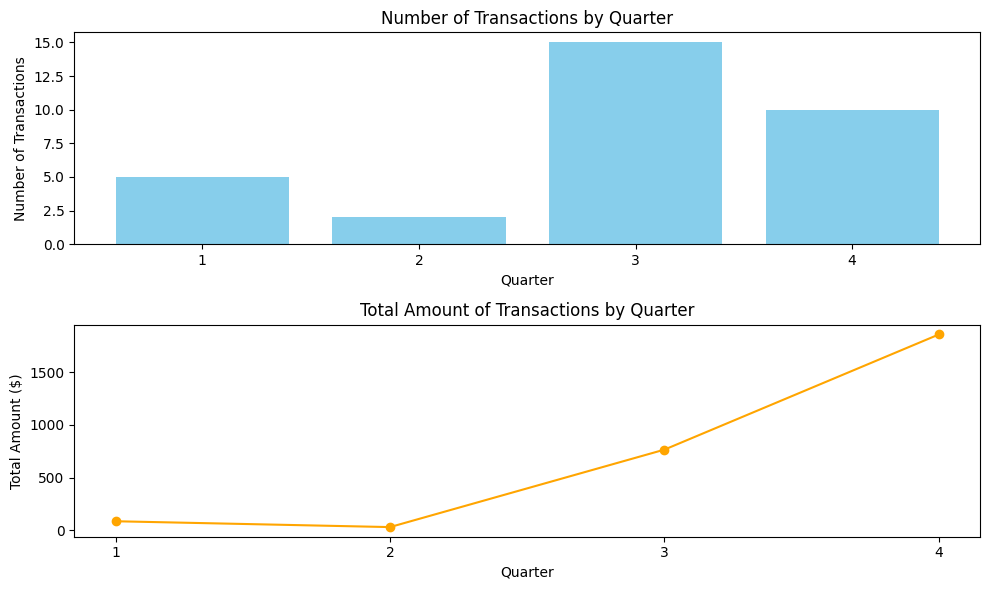

<Figure size 640x480 with 0 Axes>

In [91]:
# Define quarters
quarters = pd.to_datetime(df['Date']).dt.quarter.unique()

# Group transactions by quarter and calculate count and sum
quarterly_transactions = df.groupby(pd.to_datetime(df['Date']).dt.quarter).agg({'Date': 'count', 'Amount': 'sum'})

# Plotting
plt.figure(figsize=(10, 6))

# Number of Transactions by Quarter
plt.subplot(2, 1, 1)
plt.bar(quarterly_transactions.index.astype(int), quarterly_transactions['Date'], color='skyblue')
plt.title('Number of Transactions by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Transactions')
plt.xticks(quarters)

# Total Amount of Transactions by Quarter
plt.subplot(2, 1, 2)
plt.plot(quarterly_transactions.index, quarterly_transactions['Amount'], marker='o', color='orange')
plt.title('Total Amount of Transactions by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Amount ($)')
plt.xticks(quarters)

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()


### Visualize the distribution of spending across different merchant categories

In [94]:

df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime if not already done

# Group transactions by merchant category and calculate total amount spent in each category
category_spending = df.groupby('Merchant Category')['Amount'].sum().sort_values().reset_index()

# Plotting with Plotly
fig = px.bar(category_spending, x='Merchant Category', y='Amount', color='Amount',
             labels={'Amount': 'Total Amount ($)'}, color_continuous_scale='reds')

fig.update_layout(title='Spending Distribution Across Merchant Categories',
                  xaxis_title='Merchant Category',
                  yaxis_title='Total Amount ($)',
                  xaxis={'categoryorder': 'total descending'})  # Sort x-axis categories by total amount descending

fig.show()

### Determine which merchants you spent the most with during the year and analyze your spending behavior with each merchant

1. Group the transactions by the "Name" (merchants) column and calculate the total amount spent with each merchant.
2. Sort the merchants based on the total amount spent to identify the top spenders.
3. Analyze your spending behavior with each top merchant, which may include examining frequency of transactions, average transaction amounts, and any trends or patterns.

In [ ]:
# Group transactions by merchant (Name) and calculate total amount spent with each merchant
merchant_spending = df.groupby('Name')['Amount'].sum().sort_values(ascending=False)

# Display top merchants
top_merchants = merchant_spending.head(3)  # Assuming we want to analyze the top 3 spenders
print("Top Three Merchants:\n -----------------------\n", top_merchants)

i = 1
# Analyze spending behavior with each top merchant
print("\nDetails of top three merchants:\n -------------------------------")
for merchant in top_merchants.index:
    merchant_transactions = df[df['Name'] == merchant]
    total_transactions = len(merchant_transactions)
    average_transaction_amount = merchant_transactions['Amount'].mean()
    print(f"\nMerchant {i}: {merchant}")
    print(f"Total Transactions: {total_transactions}")
    print(f"Average Transaction Amount: ${average_transaction_amount:.2f}")
    i = i +1

Top Three Merchants:
 -----------------------
 Name
Airbnb Payments Inc.    1060.07
Viator (TripAdvisor)     517.51
Vitacost.com             287.91
Name: Amount, dtype: float64

Details of top three merchants:
 -------------------------------

Merchant 1: Airbnb Payments Inc.
Total Transactions: 1
Average Transaction Amount: $1060.07

Merchant 2: Viator (TripAdvisor)
Total Transactions: 1
Average Transaction Amount: $517.51

Merchant 3: Vitacost.com
Total Transactions: 2
Average Transaction Amount: $143.95


### Visualize the distribution of transaction statuses.

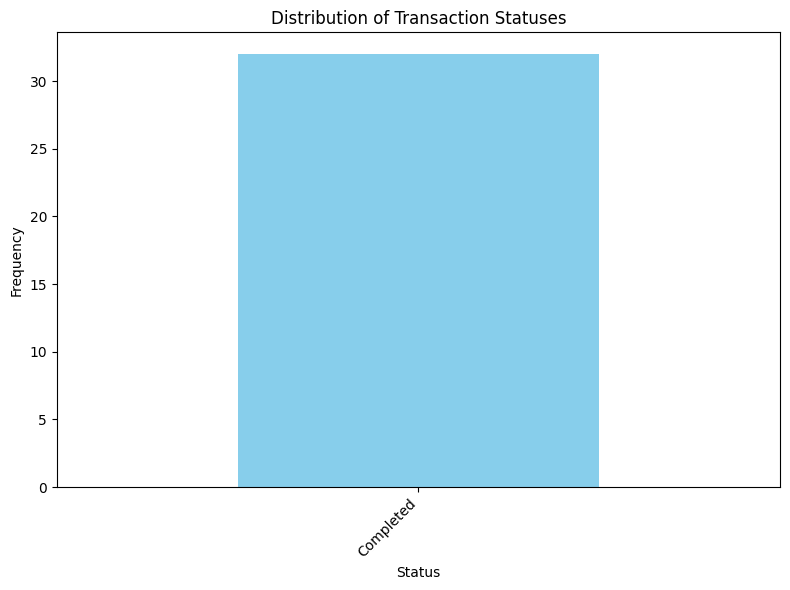

In [ ]:
# Group transactions by status and calculate the frequency of each status
status_distribution = df['Status'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
status_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Transaction Statuses')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Generate a line graph showing how your account balance changed over time as a result of the transactions.
 - The x-axis represents the dates of the transactions, and the y-axis represents the account balance. 
 - Each point on the graph corresponds to a specific date, and the line connects these points to show the trend in the account balance over time.

In [ ]:
# Calculate account balance over time
df['Account Balance'] = df['Amount'].cumsum()

# Plotting with Plotly
fig = px.line(df, x='Date', y='Account Balance', title='Account Balance Over Time',
              labels={'Account Balance': 'Account Balance ($)'}, 
              markers=True, line_shape='linear')

fig.update_layout(xaxis_title='Date', yaxis_title='Account Balance ($)',
                  xaxis=dict(tickformat='%Y-%m-%d'))  # Format x-axis tick labels as dates

fig.show()